In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('cleaned_data.csv')
df['default payment next month']

0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64

In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, n_jobs=None,
                           penalty='l2', random_state=None, solver='warn', tol=0.0001, verbose=0,
                           warm_start=False)

In [7]:
my_new_lr

LogisticRegression(solver='warn')

In [8]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [10]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [12]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [13]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [18]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

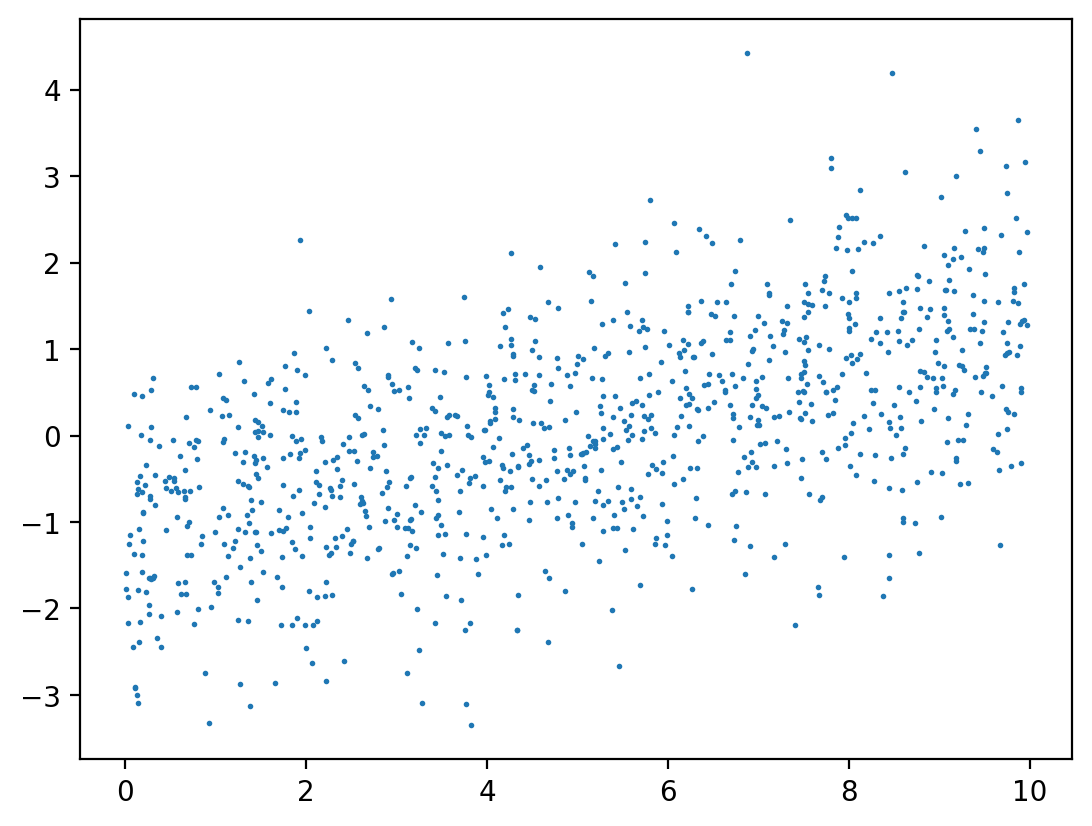

In [19]:
plt.scatter(X, y, s=1)

# Exercício 8

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [21]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825888
[0.24002588]


In [22]:
y_pred = lin_reg.predict(X.reshape(-1,1))

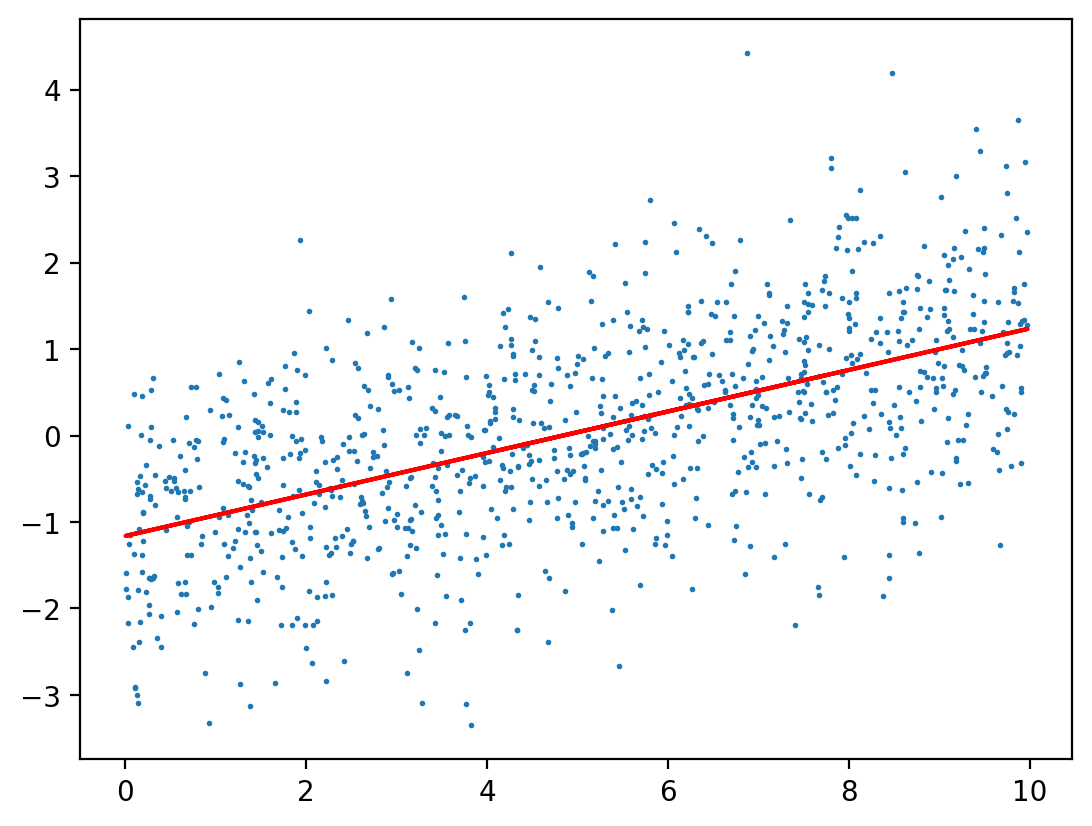

In [23]:
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, color='red')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [26]:
np.mean(y_train)

0.223102526838873

In [27]:
np.mean(y_test)

0.21657603600225014

In [28]:
from sklearn.linear_model import LogisticRegression

In [31]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, 
                                intercept_scaling=1, max_iter=100, n_jobs=None, 
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, 
                                warm_start=False)

In [32]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [33]:
y_pred = example_lr.predict(X_test)

In [34]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [35]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [36]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

# Exercício 9

In [38]:
P = sum(y_test)
P

1155

In [39]:
TP = sum( (y_test == 1) & (y_pred == 1) )
TP

0

In [40]:
TPR = TP/P
TPR

0.0

In [41]:
FN = sum( (y_test == 1) & (y_pred == 0) )
FN

1155

In [42]:
FNR = FN/P
FNR

1.0

In [43]:
N = sum(y_test == 0)
N

4178

In [46]:
TN = sum((y_pred == 0) & (y_test == 0))
TN

4178

In [47]:
FP = sum((y_pred == 1) & (y_test == 0))
FP

0

In [48]:
TNR = TN/N
FPR = FP/N
print(TNR, FPR)

1.0 0.0


In [49]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

# Exercício 10

In [50]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [52]:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [53]:
prob_sum.shape

(5333,)

In [54]:
np.unique(prob_sum)

array([1.])

In [55]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

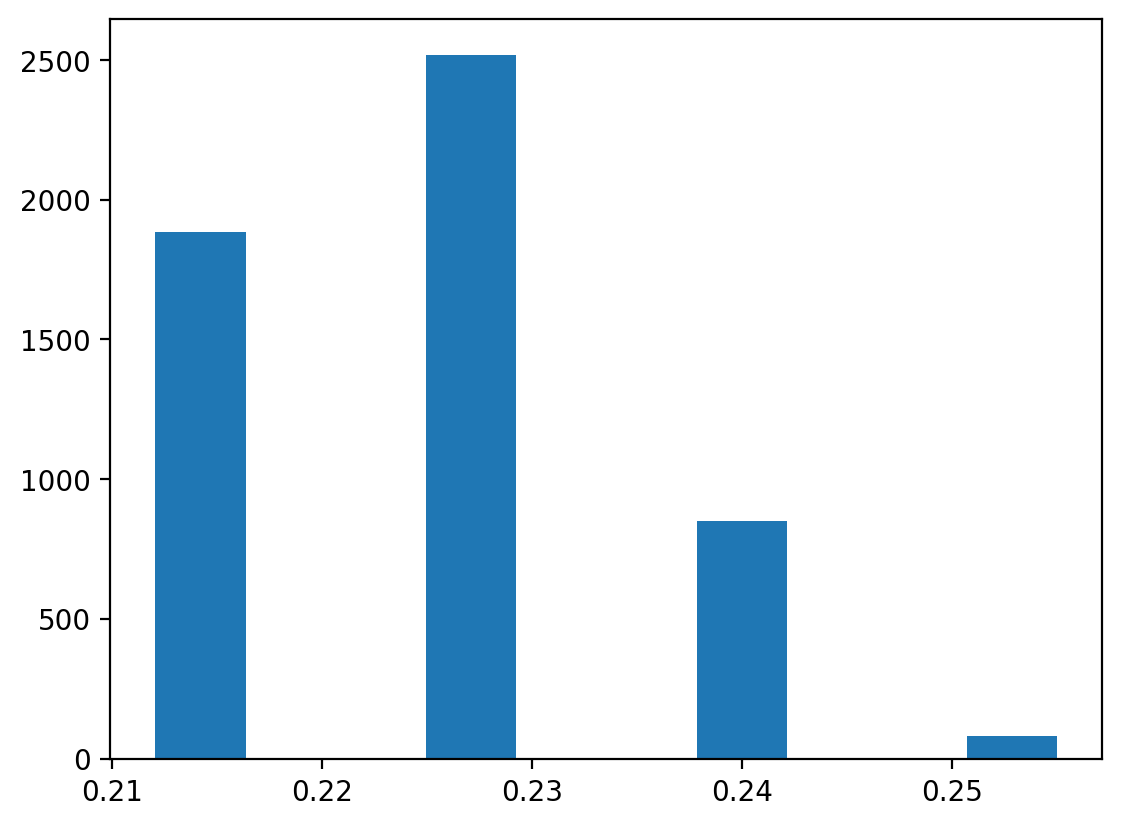

In [56]:
plt.hist(pos_proba)

In [57]:
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]

Text(0, 0.5, 'Number of Samples')

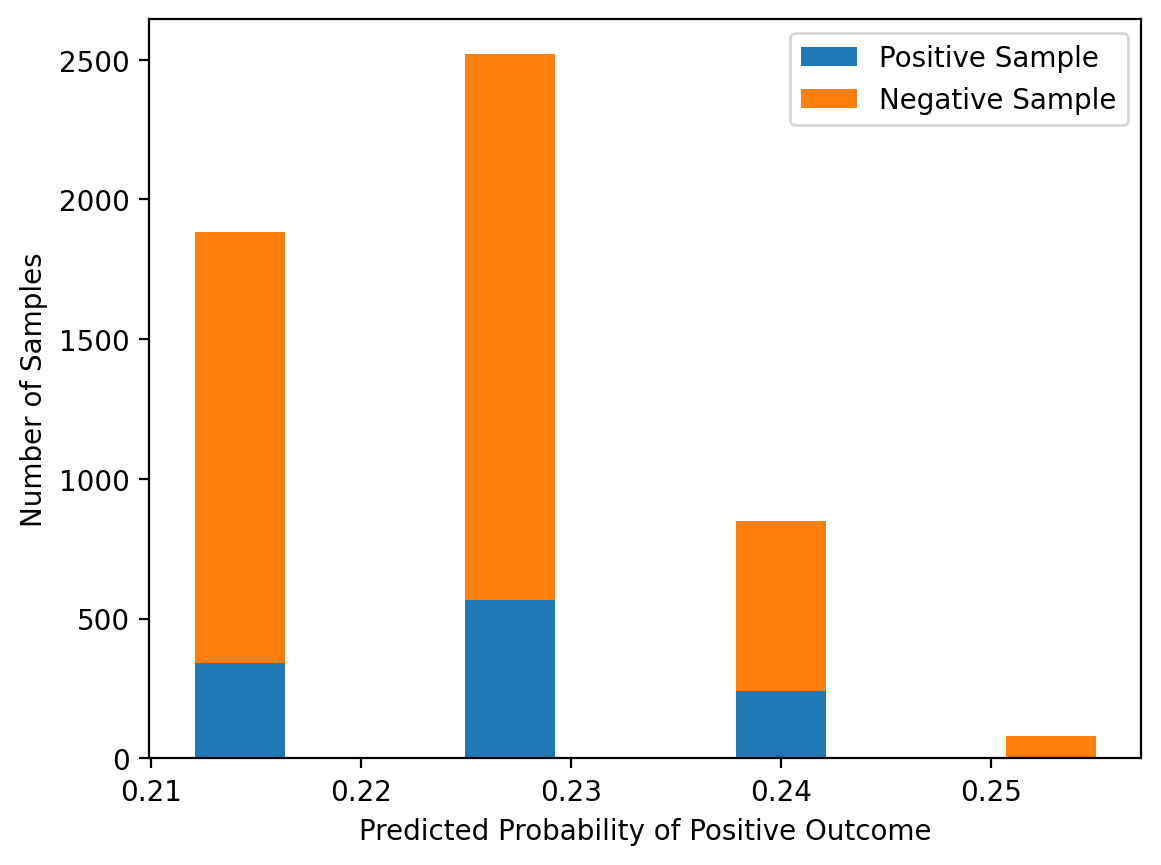

In [58]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive Sample', 'Negative Sample'])
plt.xlabel('Predicted Probability of Positive Outcome')
plt.ylabel('Number of Samples')

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

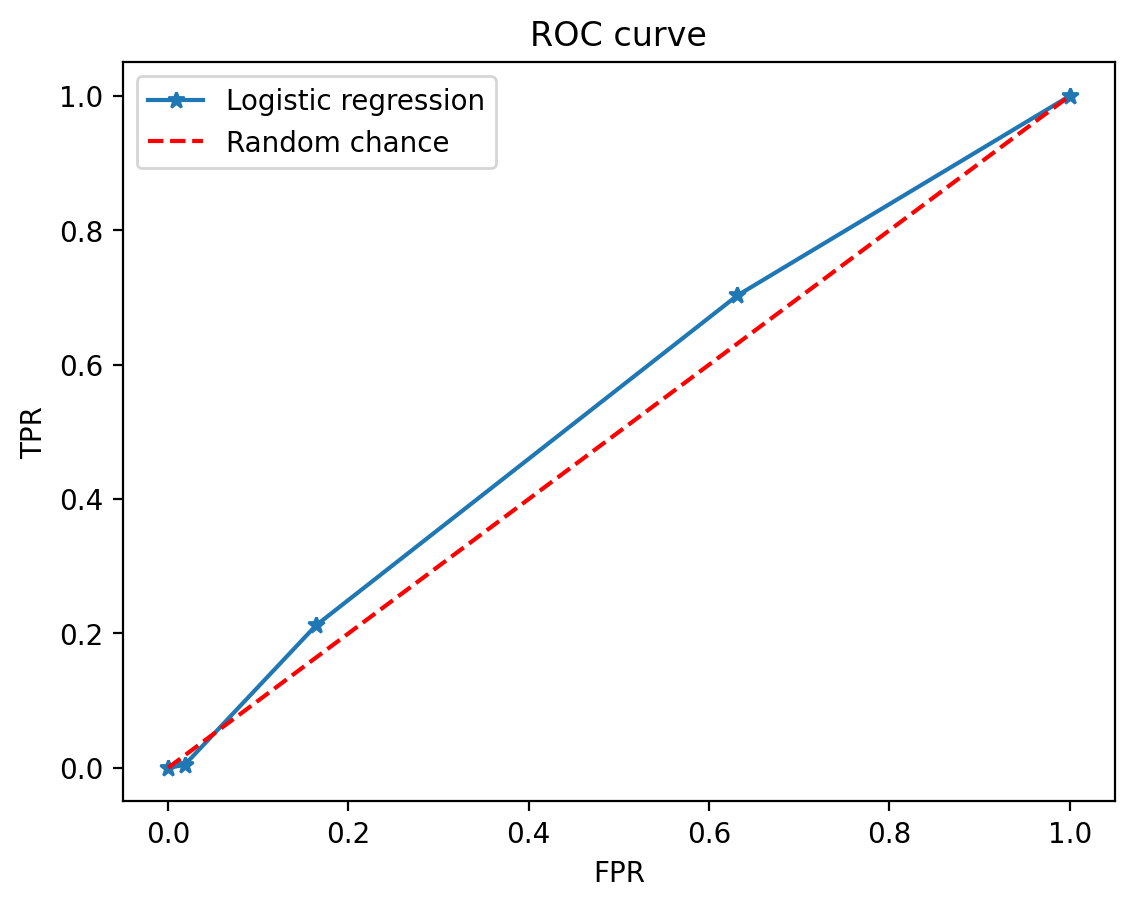

In [60]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [61]:
thresholds

array([       inf, 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [62]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

# Atividade 2

In [63]:
df_x = df['LIMIT_BAL'].values.reshape(-1,1)
df_y = df['default payment next month'].values

In [64]:
df_x

array([[ 20000],
       [120000],
       [ 90000],
       ...,
       [ 30000],
       [ 80000],
       [ 50000]], dtype=int64)

In [65]:
df_y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=24)

In [67]:
reglog = LogisticRegression()

In [68]:
reglog.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_proba = reglog.predict_proba(X_test)
y_proba

array([[0.78106157, 0.21893843],
       [0.71327837, 0.28672163],
       [0.80265248, 0.19734752],
       ...,
       [0.71327837, 0.28672163],
       [0.81776452, 0.18223548],
       [0.74558933, 0.25441067]])

In [71]:
metrics.roc_auc_score(y_test, y_proba[:,1])

0.6201990844642832

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:,1])

Text(0.5, 1.0, 'ROC curve')

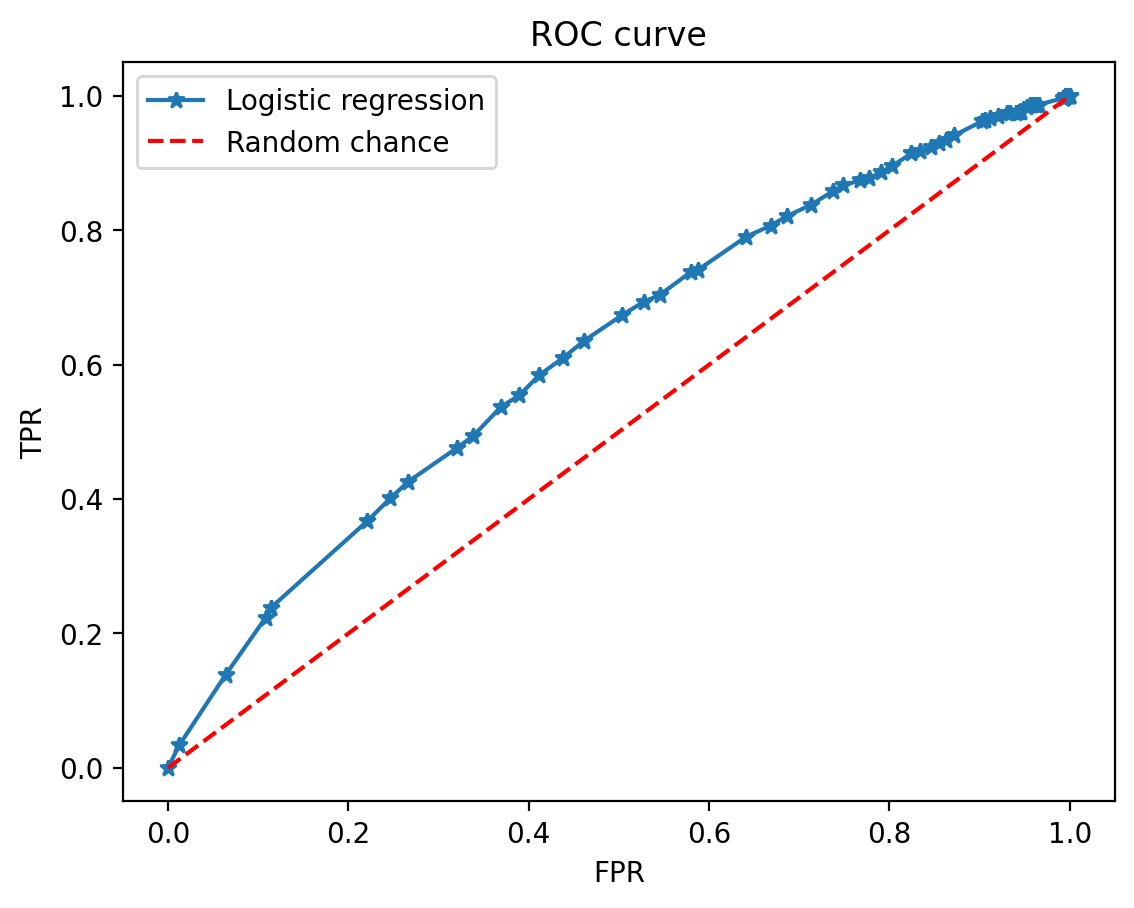

In [73]:
plt.plot(fpr, tpr, '*-')   
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [75]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_proba[:,1])

Text(0.5, 1.0, 'Precision vs. Recall curve')

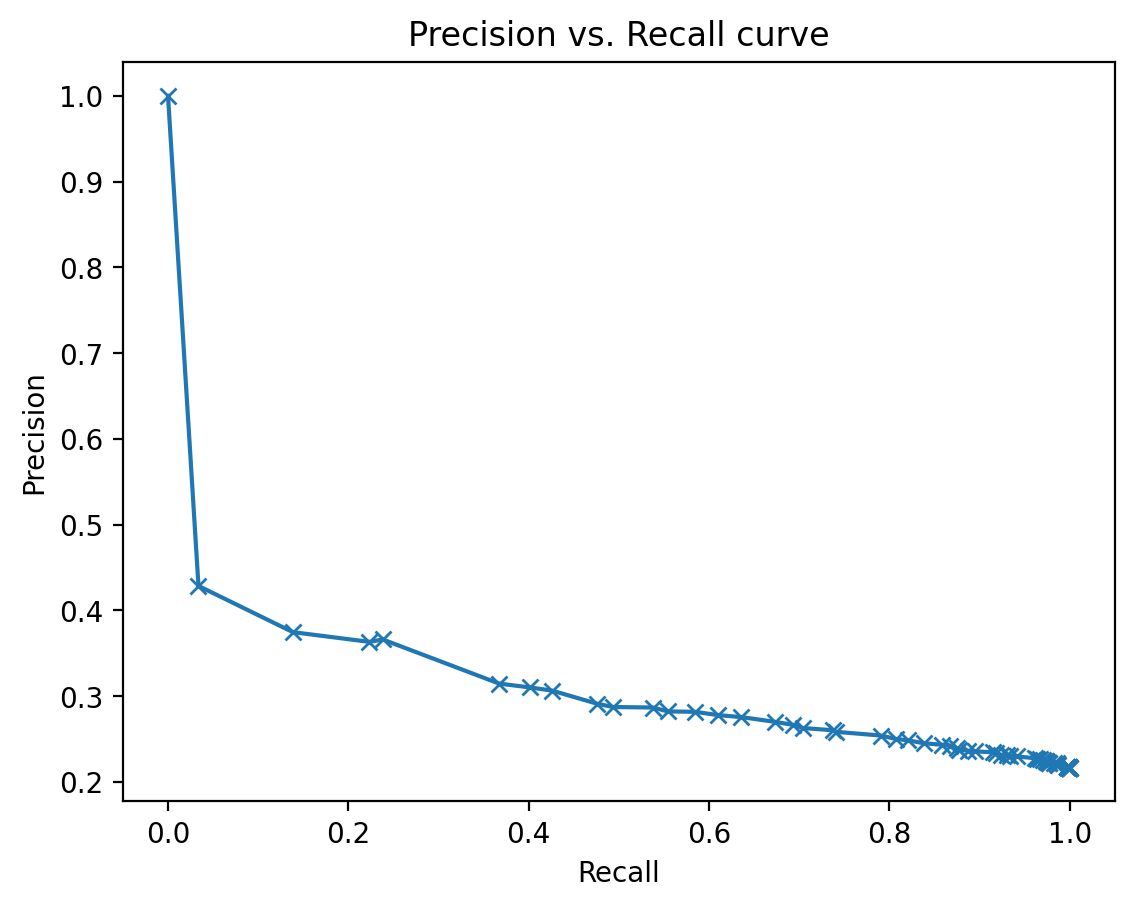

In [77]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall curve')

In [78]:
auc_prec_recall = metrics.auc(recall, precision)
auc_prec_recall

0.31566964427378624

In [80]:
roc_auc_train = metrics.roc_auc_score(y_train, reglog.predict_proba(X_train)[:,1])
roc_auc_train

0.6182918113358344